In [86]:
%matplotlib notebook
import pandas as pd
import numpy as np
import pyexcel_xlsx
%pylab inline
#%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

from pandas.plotting import scatter_matrix

Populating the interactive namespace from numpy and matplotlib


In [87]:
pylab.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams.update({'font.size': 25,'legend.fontsize':25, 'lines.markersize' : 15, 'xtick.labelsize': 20, 'ytick.labelsize': 20 })#,'font.family': 'serif'})
rc('axes', linewidth=3)
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import AutoMinorLocator


In [88]:
data = pd.read_excel("/Users/lszczyrba/Documents/Research/Projects/PR_Housing/Data/PYTHON/CleanDatafor_JMP.xlsx")
df = pd.DataFrame(data)
df = df.set_index(['FIPS'])

In [89]:
df

,Prop_SFHA_,Prop_DG_Ar,Ave_LS_cod,DG_MaxDe_1,HurTrack_D,PeakGust_1,MaxSusta_1,DMG_Index,Count_,StrVI,SeVI,Str+SeVI,SoVI
FIPS,,,,,,,,,,,,,
72001956300,0.02,0.00,2.00,0.00,0.24,44.26,34.87,0.01,2414,3.07,-8.41,-5.35,-9.44
72001956400,0.03,0.02,2.00,2.72,0.27,43.81,33.98,1.78,1854,7.84,-7.49,0.35,-14.31
72001956500,0.01,0.00,1.88,0.00,0.29,43.36,33.98,0.71,1833,5.42,-13.13,-7.71,-8.48
72001956600,0.05,0.00,1.80,0.00,0.26,43.81,34.42,0.01,698,1.21,-7.72,-6.51,-7.78
72001956700,0.10,0.00,2.00,0.00,0.26,43.81,34.42,0.01,790,1.30,-6.66,-5.35,-6.12
72001956800,0.01,0.00,1.96,0.00,0.26,43.81,33.98,2.85,2528,5.90,-5.07,0.84,-8.41
72003430100,0.56,0.52,1.17,6.64,0.27,38.00,30.40,3.76,2369,4.36,4.08,8.44,-0.53
72003430200,0.38,0.43,1.00,4.51,0.27,38.00,30.40,1.77,2141,6.97,11.14,18.11,-0.03
72003430300,0.20,0.00,1.00,0.00,0.29,37.55,30.40,2.04,1125,4.92,8.36,13.28,-3.72


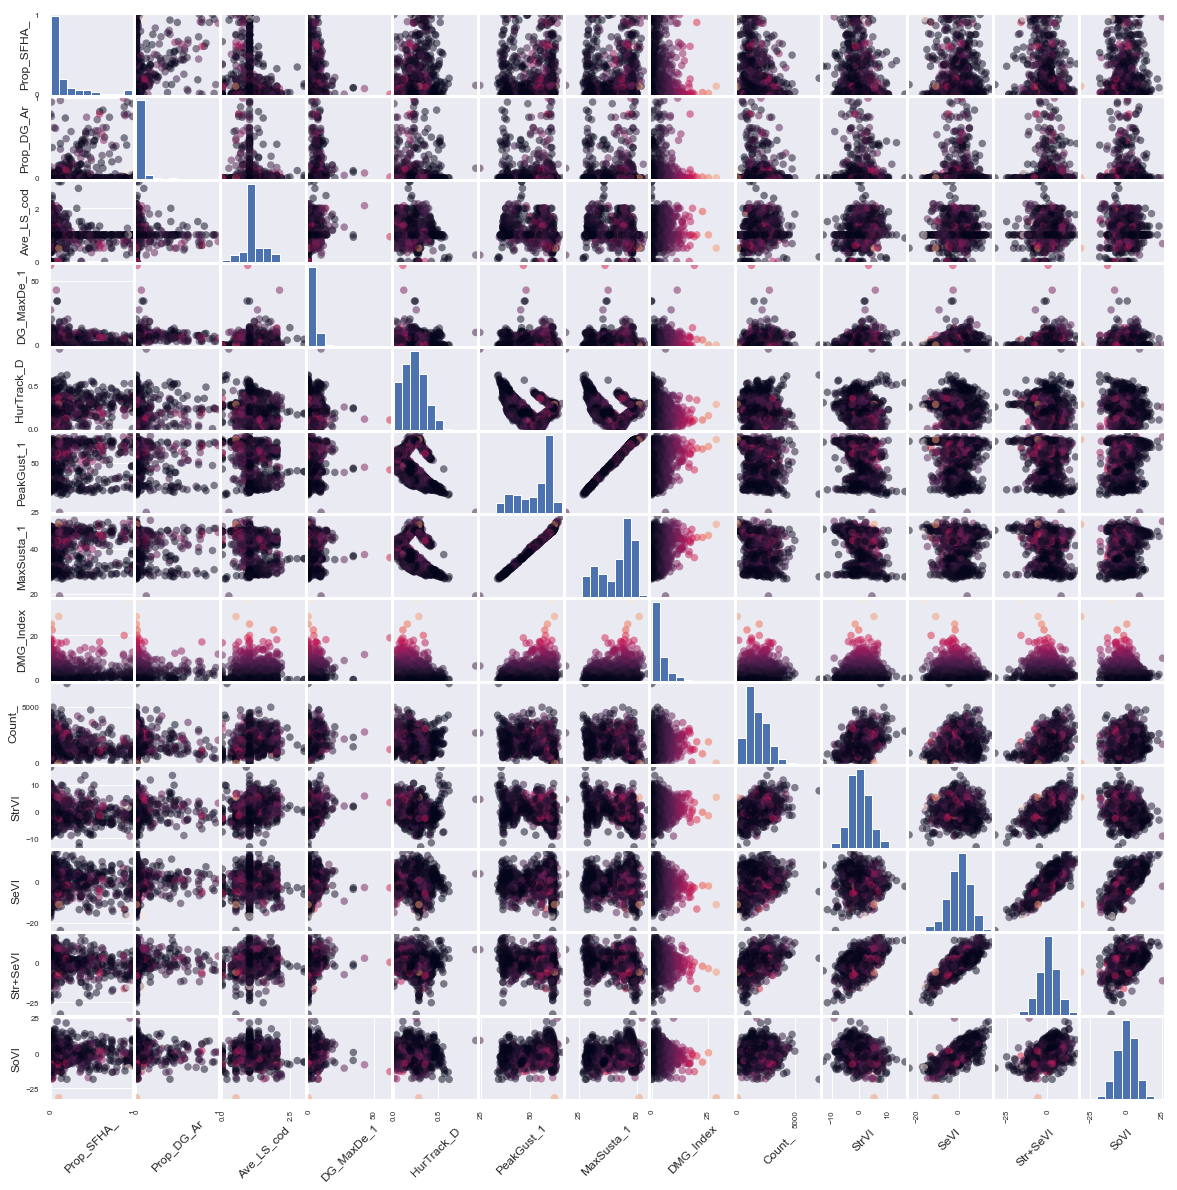

In [41]:
scatter_matrix = scatter_matrix(df, c=df['DMG_Index'], figsize = [20,20])
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 12, rotation = 45)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 12, rotation = 90)

In [42]:
df.describe()

,Prop_SFHA_,Prop_DG_Ar,Ave_LS_cod,DG_MaxDe_1,HurTrack_D,PeakGust_1,MaxSusta_1,DMG_Index,Count_,StrVI,SeVI,Str+SeVI,SoVI
count,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,0.173662,0.058447,1.104161,2.634887,0.223594,52.697914,41.591950,3.416542,1702.182540,0.000533,0.020068,0.020624,-0.005000
std,0.260877,0.159692,0.412690,4.692369,0.126709,8.664104,6.932878,3.902724,935.425845,3.766862,5.450390,6.458343,6.692986
min,0.000000,0.000000,0.000000,0.000000,0.000000,24.590000,19.220000,0.010000,7.000000,-13.150000,-23.740000,-32.430000,-31.560000
25%,0.000000,0.000000,1.000000,0.000000,0.130000,45.150000,35.320000,0.730000,995.250000,-2.635000,-3.087500,-3.320000,-4.537500
50%,0.040000,0.000000,1.000000,0.000000,0.220000,55.880000,44.260000,2.285000,1530.500000,-0.190000,0.630000,0.335000,0.310000
75%,0.220000,0.020000,1.290000,4.502500,0.290000,59.900000,47.390000,4.660000,2293.000000,2.417500,3.697500,4.025000,4.372500
max,1.000000,1.000000,3.000000,61.940000,0.920000,65.710000,54.540000,36.080000,7069.000000,16.520000,15.220000,18.110000,25.160000


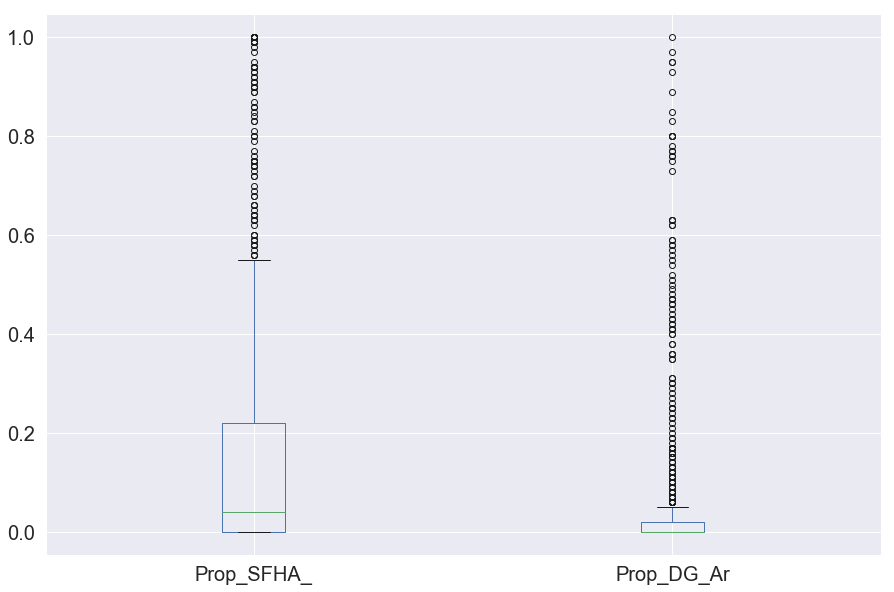

In [43]:
boxplot = df.boxplot(column=['Prop_SFHA_', 'Prop_DG_Ar'])

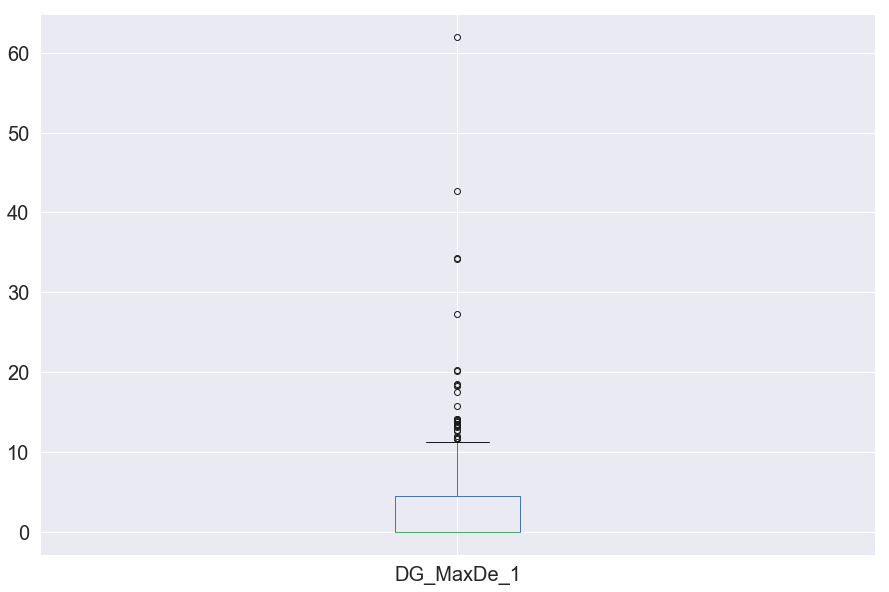

In [44]:
boxplot = df.boxplot(column=['DG_MaxDe_1'])

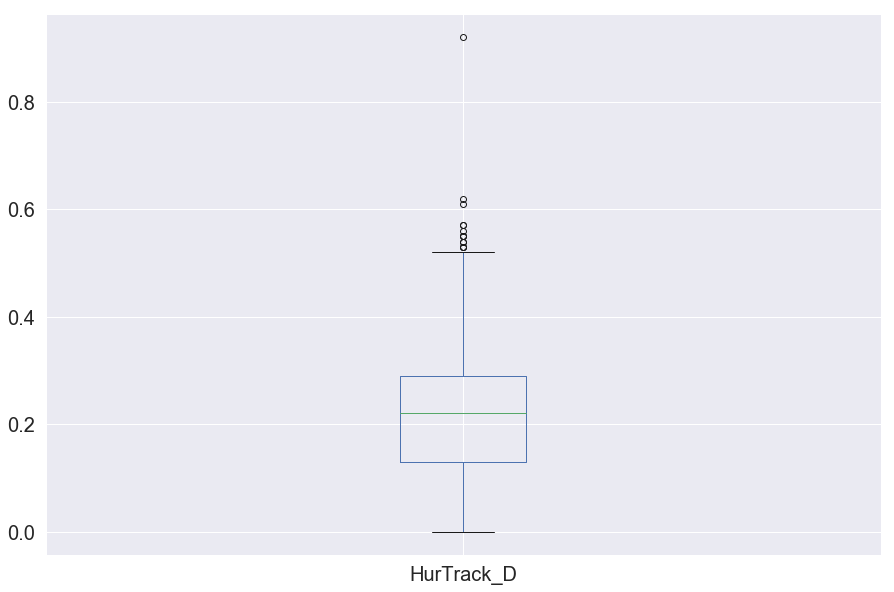

In [45]:
boxplot = df.boxplot(column=['HurTrack_D'])

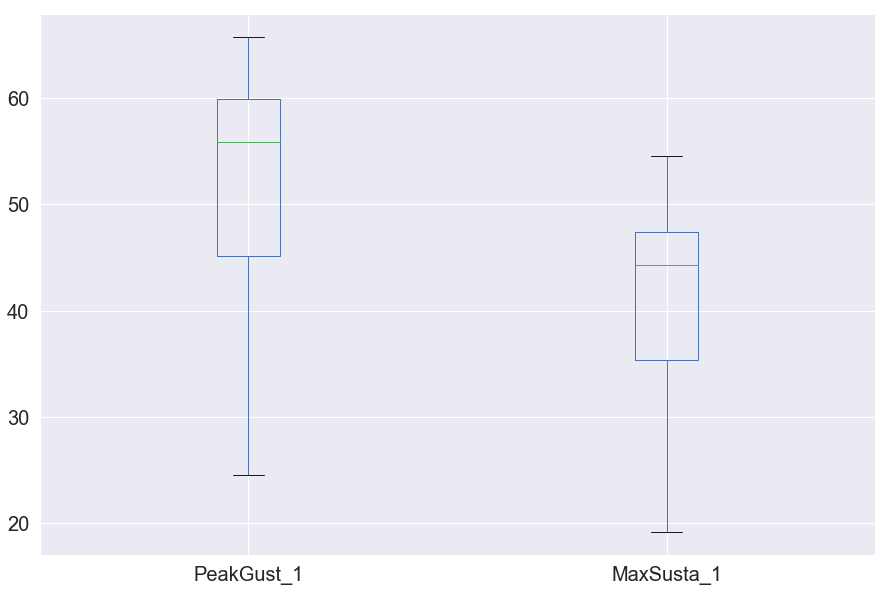

In [46]:
boxplot = df.boxplot(column=['PeakGust_1', 'MaxSusta_1'])

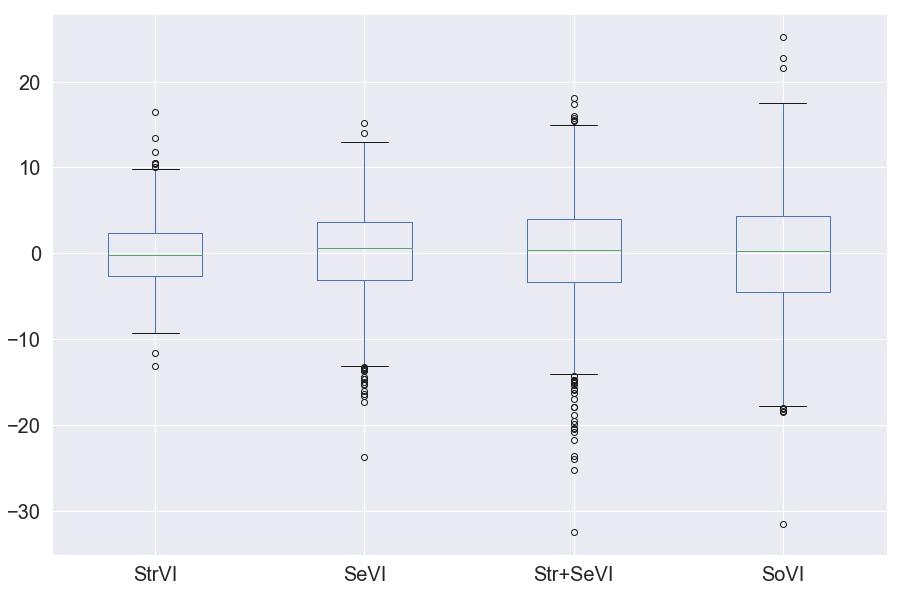

In [47]:
boxplot = df.boxplot(column=['StrVI', 'SeVI', 'Str+SeVI', 'SoVI'])

In [48]:
for col in data.columns:
    print(col)

FIPS
Prop_SFHA_
Prop_DG_Ar
Ave_LS_cod
DG_MaxDe_1
HurTrack_D
PeakGust_1
MaxSusta_1
DMG_Index
Count_
StrVI
SeVI
Str+SeVI
SoVI


## This plot is a correlation matrix, show's Pearson Product Moment Correlation Coeffcient, aka "Pearson's r", linear dependence b/w pairs of features. -1 = perfectly negatively correlated, 0 is no correlation, 1 is perfectly positively correlated

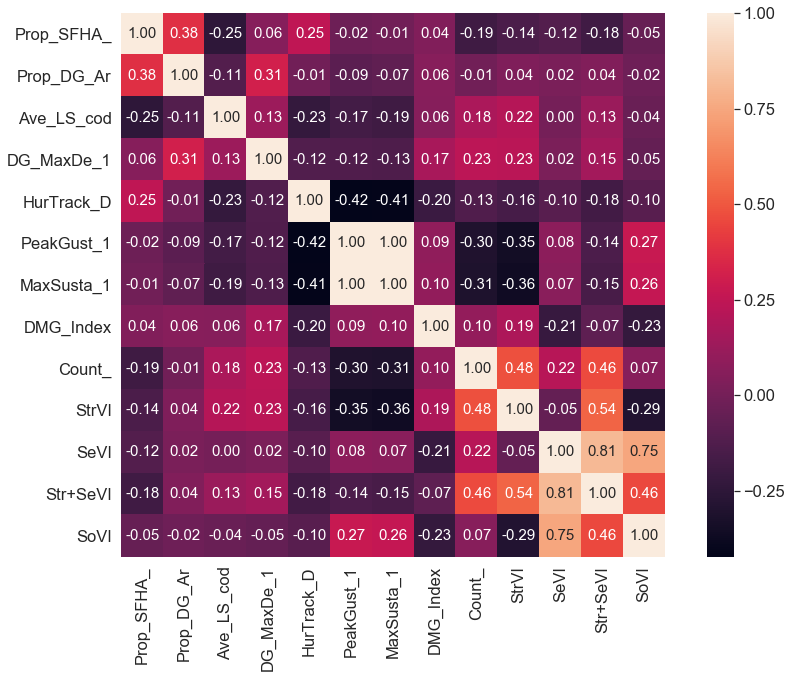

In [49]:
cols = ['Prop_SFHA_','Prop_DG_Ar','Ave_LS_cod','DG_MaxDe_1','HurTrack_D','PeakGust_1','MaxSusta_1','DMG_Index','Count_','StrVI','SeVI','Str+SeVI','SoVI']
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':15},
                yticklabels = cols,
                xticklabels = cols)
plt.show()

In [50]:
df.head()


,Prop_SFHA_,Prop_DG_Ar,Ave_LS_cod,DG_MaxDe_1,HurTrack_D,PeakGust_1,MaxSusta_1,DMG_Index,Count_,StrVI,SeVI,Str+SeVI,SoVI
FIPS,,,,,,,,,,,,,
72001956300,0.02,0.00,2.00,0.00,0.24,44.26,34.87,0.01,2414,3.07,-8.41,-5.35,-9.44
72001956400,0.03,0.02,2.00,2.72,0.27,43.81,33.98,1.78,1854,7.84,-7.49,0.35,-14.31
72001956500,0.01,0.00,1.88,0.00,0.29,43.36,33.98,0.71,1833,5.42,-13.13,-7.71,-8.48
72001956600,0.05,0.00,1.80,0.00,0.26,43.81,34.42,0.01,698,1.21,-7.72,-6.51,-7.78
72001956700,0.10,0.00,2.00,0.00,0.26,43.81,34.42,0.01,790,1.30,-6.66,-5.35,-6.12


## Add in Mean DG Value

In [90]:
data2 = pd.read_excel("/Users/lszczyrba/Documents/Research/Projects/PR_Housing/Data/DG_Zonal_Stats.xlsx")
df_DG = pd.DataFrame(data2)

In [91]:
for col in df_DG.columns:
    print(col)

Rowid_
FIPS
ZONE_CODE
COUNT
AREA
MIN
MAX
RANGE
MEAN
STD
SUM


In [92]:
df_DG.head()

,Rowid_,FIPS,ZONE_CODE,COUNT,AREA,MIN,MAX,RANGE,MEAN,STD,SUM
0,NaN,72097081512,1,317767,8.551039e+07,0.000843,32.123077,32.122234,23.794818,3.718644,7.561208e+06
1,NaN,72023830102,6,258934,6.967856e+07,0.000076,31.494505,31.494429,16.557520,5.728721,4.287305e+06
2,NaN,72023830200,7,193271,5.200880e+07,0.000072,28.303806,28.303734,11.823447,6.960121,2.285129e+06
3,NaN,72023830300,8,1975,5.314681e+05,0.001213,4.896801,4.895588,1.453788,1.015288,2.871232e+03
4,NaN,72023830400,9,91323,2.457482e+07,0.000408,30.329470,30.329062,14.759861,8.525876,1.347915e+06


In [93]:
df_DG = df_DG.set_index(['FIPS'])

In [94]:
df_DG.head()

,Rowid_,ZONE_CODE,COUNT,AREA,MIN,MAX,RANGE,MEAN,STD,SUM
FIPS,,,,,,,,,,
72097081512,NaN,1,317767,8.551039e+07,0.000843,32.123077,32.122234,23.794818,3.718644,7.561208e+06
72023830102,NaN,6,258934,6.967856e+07,0.000076,31.494505,31.494429,16.557520,5.728721,4.287305e+06
72023830200,NaN,7,193271,5.200880e+07,0.000072,28.303806,28.303734,11.823447,6.960121,2.285129e+06
72023830300,NaN,8,1975,5.314681e+05,0.001213,4.896801,4.895588,1.453788,1.015288,2.871232e+03
72023830400,NaN,9,91323,2.457482e+07,0.000408,30.329470,30.329062,14.759861,8.525876,1.347915e+06


In [95]:
df2 = df.join(df_DG)

In [96]:
for col in df2.columns:
    print(col)

Prop_SFHA_
Prop_DG_Ar
Ave_LS_cod
DG_MaxDe_1
HurTrack_D
PeakGust_1
MaxSusta_1
DMG_Index
Count_
StrVI
SeVI
Str+SeVI
SoVI
Rowid_
ZONE_CODE
COUNT
AREA
MIN
MAX
RANGE
MEAN
STD
SUM


In [97]:
df2 = df2.drop(['Rowid_','ZONE_CODE','COUNT','AREA','MIN','MAX','RANGE','STD','SUM'], axis=1)

In [98]:
df2.head()

,Prop_SFHA_,Prop_DG_Ar,Ave_LS_cod,DG_MaxDe_1,HurTrack_D,PeakGust_1,MaxSusta_1,DMG_Index,Count_,StrVI,SeVI,Str+SeVI,SoVI,MEAN
FIPS,,,,,,,,,,,,,,
72001956300,0.02,0.00,2.00,0.00,0.24,44.26,34.87,0.01,2414,3.07,-8.41,-5.35,-9.44,NaN
72001956400,0.03,0.02,2.00,2.72,0.27,43.81,33.98,1.78,1854,7.84,-7.49,0.35,-14.31,8.427649
72001956500,0.01,0.00,1.88,0.00,0.29,43.36,33.98,0.71,1833,5.42,-13.13,-7.71,-8.48,NaN
72001956600,0.05,0.00,1.80,0.00,0.26,43.81,34.42,0.01,698,1.21,-7.72,-6.51,-7.78,NaN
72001956700,0.10,0.00,2.00,0.00,0.26,43.81,34.42,0.01,790,1.30,-6.66,-5.35,-6.12,NaN


In [99]:
df2.MEAN.fillna(0, inplace=True)

In [100]:
df2.rename(columns={"MEAN":"DG_mean"}, inplace=True)

In [102]:
df2

,Prop_SFHA_,Prop_DG_Ar,Ave_LS_cod,DG_MaxDe_1,HurTrack_D,PeakGust_1,MaxSusta_1,DMG_Index,Count_,StrVI,SeVI,Str+SeVI,SoVI,DG_mean
FIPS,,,,,,,,,,,,,,
72001956300,0.02,0.00,2.00,0.00,0.24,44.26,34.87,0.01,2414,3.07,-8.41,-5.35,-9.44,0.000000
72001956400,0.03,0.02,2.00,2.72,0.27,43.81,33.98,1.78,1854,7.84,-7.49,0.35,-14.31,8.427649
72001956500,0.01,0.00,1.88,0.00,0.29,43.36,33.98,0.71,1833,5.42,-13.13,-7.71,-8.48,0.000000
72001956600,0.05,0.00,1.80,0.00,0.26,43.81,34.42,0.01,698,1.21,-7.72,-6.51,-7.78,0.000000
72001956700,0.10,0.00,2.00,0.00,0.26,43.81,34.42,0.01,790,1.30,-6.66,-5.35,-6.12,0.000000
72001956800,0.01,0.00,1.96,0.00,0.26,43.81,33.98,2.85,2528,5.90,-5.07,0.84,-8.41,0.000000
72003430100,0.56,0.52,1.17,6.64,0.27,38.00,30.40,3.76,2369,4.36,4.08,8.44,-0.53,7.415479
72003430200,0.38,0.43,1.00,4.51,0.27,38.00,30.40,1.77,2141,6.97,11.14,18.11,-0.03,9.851787
72003430300,0.20,0.00,1.00,0.00,0.29,37.55,30.40,2.04,1125,4.92,8.36,13.28,-3.72,0.000000


In [74]:
df2 = df2.round(2)

In [76]:
df2.head()

,Prop_SFHA_,Prop_DG_Ar,Ave_LS_cod,DG_MaxDe_1,HurTrack_D,PeakGust_1,MaxSusta_1,DMG_Index,Count_,StrVI,SeVI,Str+SeVI,SoVI,DG_mean
FIPS,,,,,,,,,,,,,,
72001956300,0.02,0.00,2.00,0.00,0.24,44.26,34.87,0.01,2414,3.07,-8.41,-5.35,-9.44,0.00
72001956400,0.03,0.02,2.00,2.72,0.27,43.81,33.98,1.78,1854,7.84,-7.49,0.35,-14.31,8.43
72001956500,0.01,0.00,1.88,0.00,0.29,43.36,33.98,0.71,1833,5.42,-13.13,-7.71,-8.48,0.00
72001956600,0.05,0.00,1.80,0.00,0.26,43.81,34.42,0.01,698,1.21,-7.72,-6.51,-7.78,0.00
72001956700,0.10,0.00,2.00,0.00,0.26,43.81,34.42,0.01,790,1.30,-6.66,-5.35,-6.12,0.00


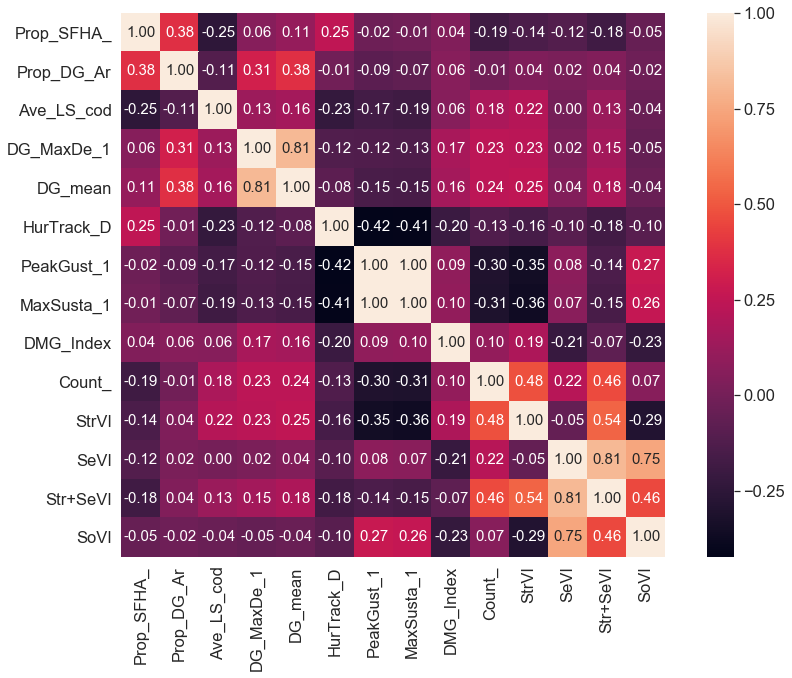

In [77]:
cols = ['Prop_SFHA_','Prop_DG_Ar','Ave_LS_cod','DG_MaxDe_1','DG_mean','HurTrack_D','PeakGust_1','MaxSusta_1','DMG_Index','Count_','StrVI','SeVI','Str+SeVI','SoVI']
cm = np.corrcoef(df2[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':15},
                yticklabels = cols,
                xticklabels = cols)
plt.show()

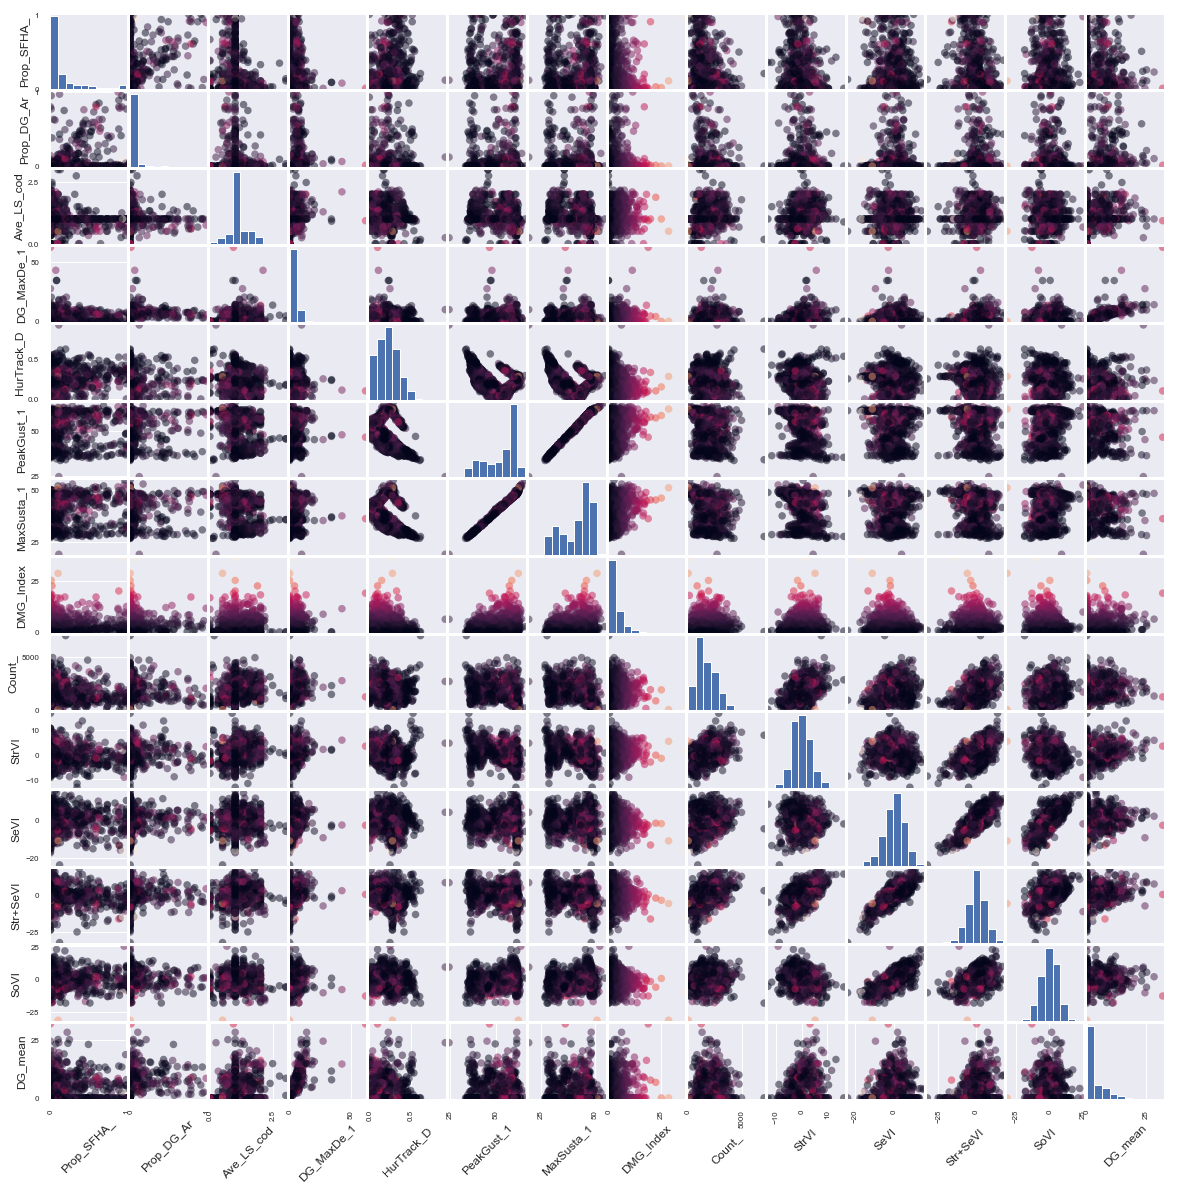

In [82]:
scatter_matrix = scatter_matrix(df2, c=df2['DMG_Index'], figsize = [20,20])
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 12, rotation = 45)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 12, rotation = 90)

# Export to Excel

In [85]:
df2.to_excel("/Users/lszczyrba/Documents/Research/Projects/PR_Housing/Data/AllFeatures20191018.xlsx")